<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://dl.dropboxusercontent.com/u/37919918/hedaro/pandas-ipython-tutorials-hedaro.jpg" title="Pandas Tutorial | Hedaro" alt="Pandas Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Group By and Plot</h1>
        <p>Some nifty ninjastics you can do with Group By and <strong>MatPlotLib</strong></p>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

<strong>The most popular Pandas tutorials. </strong><a href="https://gumroad.com/l/jVeRh" target="_blank"><strong>Get a total of 7 tutorials!</strong></a>

In [1]:
import pandas as pd
from matplotlib.pylab import plt
import sys
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.5.1 |Anaconda custom (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.18.1


In [3]:
raw = pd.read_csv('Test_9_17_Python.csv')
raw.head()

,Date,Symbol,Volume
0,1/1/2013,A,0
1,1/2/2013,A,200
2,1/3/2013,A,1200
3,1/4/2013,A,1001
4,1/5/2013,A,1300


In [4]:
df2 = raw.copy()

In [5]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [6]:
df2.dtypes

Date      datetime64[ns]
Symbol            object
Volume             int64
dtype: object

In [7]:
pool = ['boy','girl']
pool = pool*(int(len(df2)/2))
df2['Gender'] = pool
df = df2.copy()
df.head()

,Date,Symbol,Volume,Gender
0,2013-01-01,A,0,boy
1,2013-01-02,A,200,girl
2,2013-01-03,A,1200,boy
3,2013-01-04,A,1001,girl
4,2013-01-05,A,1300,boy


# Group one column and plot

In [8]:
group = df.groupby('Symbol')

In [9]:
for x in group:
    print(type(x))
    print('//////')

<class 'tuple'>
//////
<class 'tuple'>
//////
<class 'tuple'>
//////
<class 'tuple'>
//////


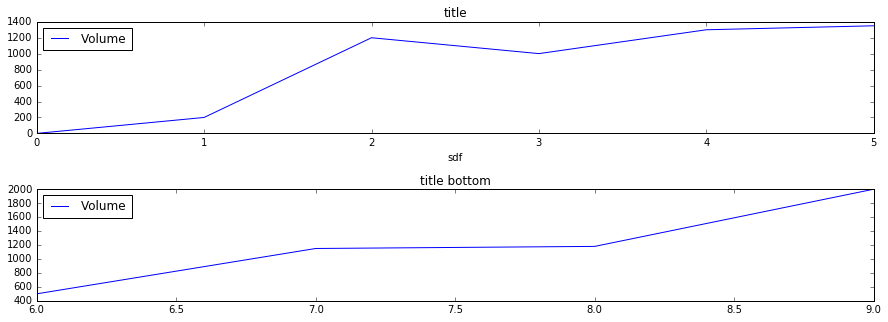

In [10]:
fig, axes = plt.subplots(2,1, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)

group.get_group('A').plot(ax=axes[0])
group.get_group('B').plot(ax=axes[1])

axes[0].set_title('title')
axes[0].set_xlabel('sdf')

axes[1].set_title('title bottom');

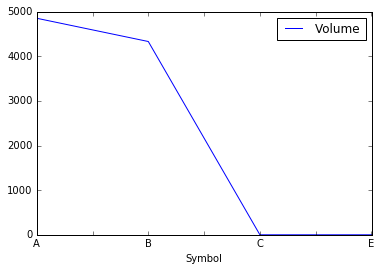

In [11]:
def plot(group):
    mask = group['Volume'].apply(lambda x: x>1000)
    mask2 = group['Symbol'] == 'A'
    mask3 = group['Symbol'] == 'B'
    
    return group['Volume'][mask & (mask2 | mask3)].sum()

a = group.apply(plot)
a = pd.DataFrame(a)
a = a.rename(columns={0:'Volume'})
a.plot();



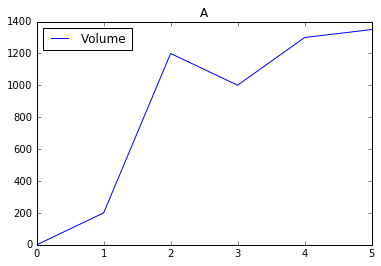

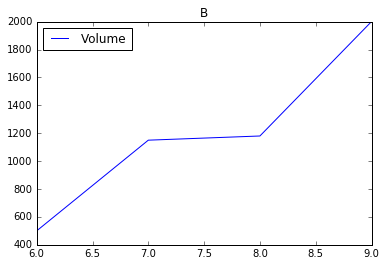

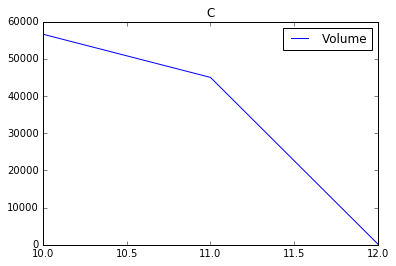

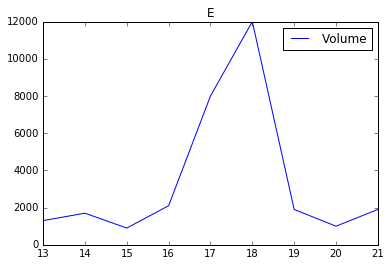

In [12]:
for i, g in group:
    g.plot(title=i)

# Group two columns and plot

In [13]:
group = df.groupby(['Symbol', 'Gender'])

In [14]:
for i, g in group:
    print(i)

('A', 'boy')
('A', 'girl')
('B', 'boy')
('B', 'girl')
('C', 'boy')
('C', 'girl')
('E', 'boy')
('E', 'girl')


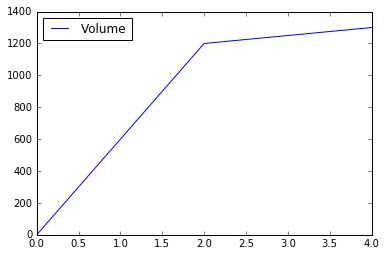

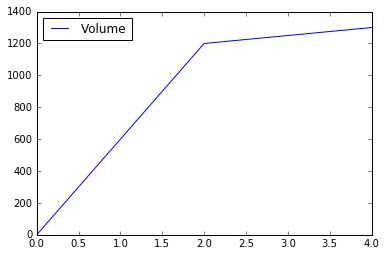

In [15]:
group.get_group(('A', 'boy')).plot()
group.get_group(('A', 'boy')).plot()

C:\Users\david\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=11.0, right=11.0
  'left=%s, right=%s') % (left, right))


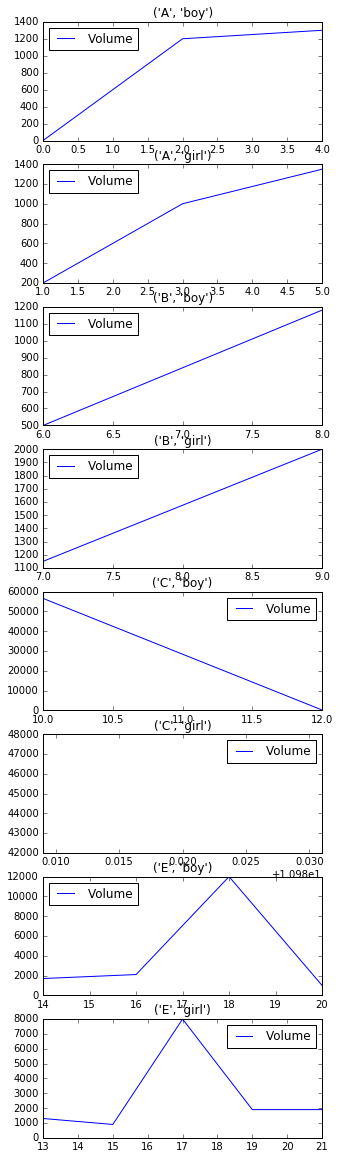

In [17]:
fig, axes = plt.subplots(len(group.groups),1, figsize=(5,20))
ix = 0

for i, g in group:
    p = g.plot(ax=axes[ix], title=str(i))
    if ix < len(axes)-1:
        ix = ix + 1
    else: 
        ix = 0
        
    

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>